In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set_palette("Set2")


In [99]:
df = pd.read_csv("output/uidai_master_clean.csv")
df.head()


,date,state,district,age_0_5,age_5_17,age_18_greater,total_enrolment,demo_age_5_17,demo_age_17_,total_demographic_updates,bio_age_5_17,bio_age_17_,total_biometric_updates,enrolment_available,demo_data_available,bio_data_available
0,2025-01-03,Andaman And Nicobar Islands,Nicobar,0.0,0.0,0.0,0.0,16.0,180.0,196.0,178.0,101.0,279.0,0,1,1
1,2025-01-03,Andaman And Nicobar Islands,North And Middle Andaman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,470.0,347.0,817.0,0,0,1
2,2025-01-03,Andaman And Nicobar Islands,South Andaman,0.0,0.0,0.0,0.0,48.0,279.0,327.0,948.0,450.0,1398.0,0,1,1
3,2025-01-03,Andhra Pradesh,Alluri Sitharama Raju,0.0,0.0,0.0,0.0,194.0,2111.0,2305.0,585.0,1408.0,1993.0,0,1,1
4,2025-01-03,Andhra Pradesh,Anakapalli,0.0,0.0,0.0,0.0,130.0,804.0,934.0,218.0,234.0,452.0,0,1,1


In [100]:
df["date"] = pd.to_datetime(df["date"])


In [101]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

df.info()


Rows: 92198
Columns: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92198 entries, 0 to 92197
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       92198 non-null  datetime64[ns]
 1   state                      92198 non-null  object        
 2   district                   92198 non-null  object        
 3   age_0_5                    92198 non-null  float64       
 4   age_5_17                   92198 non-null  float64       
 5   age_18_greater             92198 non-null  float64       
 6   total_enrolment            92198 non-null  float64       
 7   demo_age_5_17              92198 non-null  float64       
 8   demo_age_17_               92198 non-null  float64       
 9   total_demographic_updates  92198 non-null  float64       
 10  bio_age_5_17               92198 non-null  float64       
 11  bio_age_17_                92198 non-null  

In [103]:
missing = df.isnull().sum()
missing = missing[missing > 0]

print("Columns with missing values:")
print(missing if not missing.empty else "No missing values")


Columns with missing values:
No missing values


In [104]:
print("Total duplicate rows:", df.duplicated().sum())

Total duplicate rows: 0


In [105]:
key_dups = df.duplicated(subset=["date", "state", "district"]).sum()
print("Duplicate (date, state, district):", key_dups)


Duplicate (date, state, district): 0


In [106]:
df[["state", "district"]].nunique()


state        36
district    730
dtype: int64

In [107]:
df.isna().sum()


date                         0
state                        0
district                     0
age_0_5                      0
age_5_17                     0
age_18_greater               0
total_enrolment              0
demo_age_5_17                0
demo_age_17_                 0
total_demographic_updates    0
bio_age_5_17                 0
bio_age_17_                  0
total_biometric_updates      0
enrolment_available          0
demo_data_available          0
bio_data_available           0
dtype: int64

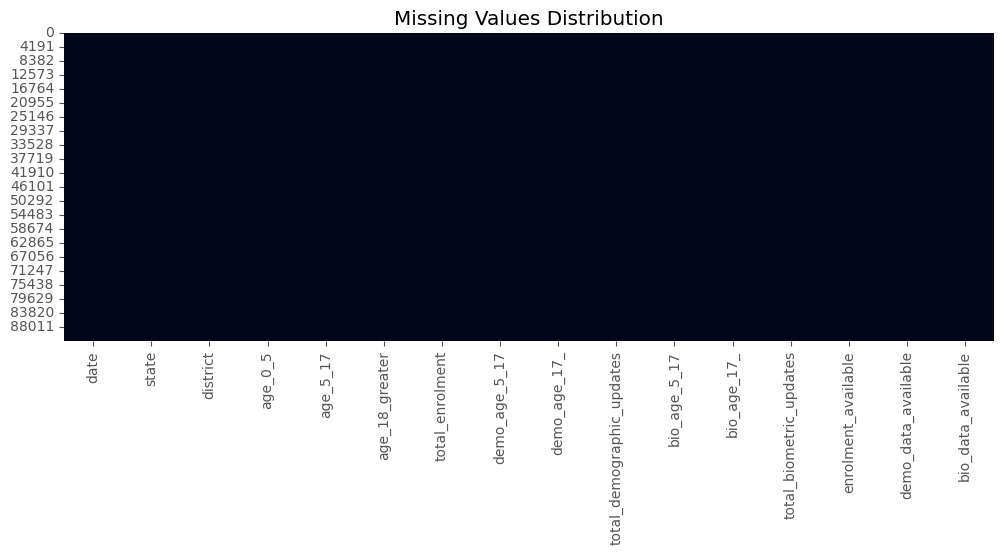

In [108]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Distribution")
plt.show()


In [109]:
df.describe().to_csv("output/eda_summary.csv")
df.describe()


,date,age_0_5,age_5_17,age_18_greater,total_enrolment,demo_age_5_17,demo_age_17_,total_demographic_updates,bio_age_5_17,bio_age_17_,total_biometric_updates,enrolment_available,demo_data_available,bio_data_available
count,92198,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000
mean,2025-09-13 18:21:12.131716608,27.368880,14.649352,1.320495,43.338728,40.344899,362.692792,403.037691,321.792978,330.907037,652.700015,0.462808,0.877524,0.597931
min,2025-01-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2025-09-03 00:00:00,0.000000,0.000000,0.000000,0.000000,2.000000,16.000000,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2025-10-18 00:00:00,0.000000,0.000000,0.000000,0.000000,11.000000,94.000000,107.000000,14.000000,13.000000,30.000000,0.000000,1.000000,1.000000
75%,2025-11-25 00:00:00,25.000000,6.000000,0.000000,35.000000,32.000000,275.000000,310.000000,186.000000,182.000000,387.000000,1.000000,1.000000,1.000000
max,2025-12-31 00:00:00,6740.000000,6096.000000,1838.000000,12219.000000,7128.000000,53488.000000,58306.000000,56618.000000,51939.000000,83938.000000,1.000000,1.000000,1.000000
std,NaN,108.181268,87.363602,18.634791,197.268372,155.579977,1448.058148,1584.842112,1456.991671,1582.970657,2903.390615,0.498618,0.327836,0.490318


In [110]:
states = sorted(df["state"].unique())
print("Total States:", len(states))

for s in states:
    print("-", s)


Total States: 36
- Andaman And Nicobar Islands
- Andhra Pradesh
- Arunachal Pradesh
- Assam
- Bihar
- Chandigarh
- Chhattisgarh
- Dadra And Nagar Haveli And Daman And Diu
- Delhi
- Goa
- Gujarat
- Haryana
- Himachal Pradesh
- Jammu And Kashmir
- Jharkhand
- Karnataka
- Kerala
- Ladakh
- Lakshadweep
- Madhya Pradesh
- Maharashtra
- Manipur
- Meghalaya
- Mizoram
- Nagaland
- Odisha
- Puducherry
- Punjab
- Rajasthan
- Sikkim
- Tamil Nadu
- Telangana
- Tripura
- Uttar Pradesh
- Uttarakhand
- West Bengal


In [111]:
districts = sorted(df["district"].unique())
print("Total Districts:", len(districts))

for d in districts[:50]:
    print("-", d)


Total Districts: 730
- Adilabad
- Agar Malwa
- Agra
- Ahmedabad
- Ahmednagar
- Aizawl
- Ajmer
- Akola
- Alappuzha
- Aligarh
- Alipurduar
- Alirajpur
- Alluri Sitharama Raju
- Almora
- Alwar
- Ambala
- Ambedkar Nagar
- Amethi
- Amravati
- Amreli
- Amritsar
- Amroha
- Anakapalli
- Anand
- Ananthapuramu
- Anantnag
- Angul
- Anjaw
- Annamayya
- Anuppur
- Araria
- Aravalli
- Ariyalur
- Arwal
- Ashoknagar
- Auraiya
- Aurangabad
- Ayodhya
- Azamgarh
- Bagalkote
- Bageshwar
- Baghpat
- Bahraich
- Bajali
- Baksa
- Balaghat
- Balangir
- Ballari
- Ballia
- Balod


In [112]:
print("Date range:")
print("From:", df["date"].min())
print("To  :", df["date"].max())
print("Total unique dates:", df["date"].nunique())


Date range:
From: 2025-01-03 00:00:00
To  : 2025-12-31 00:00:00
Total unique dates: 138


In [113]:
full_range = pd.date_range(df["date"].min(), df["date"].max())
missing_dates = full_range.difference(df["date"].unique())

print("Missing dates count:", len(missing_dates))
print("Sample missing dates:", missing_dates[:10])


Missing dates count: 225
Sample missing dates: DatetimeIndex(['2025-01-08', '2025-01-10', '2025-01-13', '2025-01-14',
               '2025-01-15', '2025-01-16', '2025-01-17', '2025-01-18',
               '2025-01-19', '2025-01-20'],
              dtype='datetime64[ns]', freq=None)


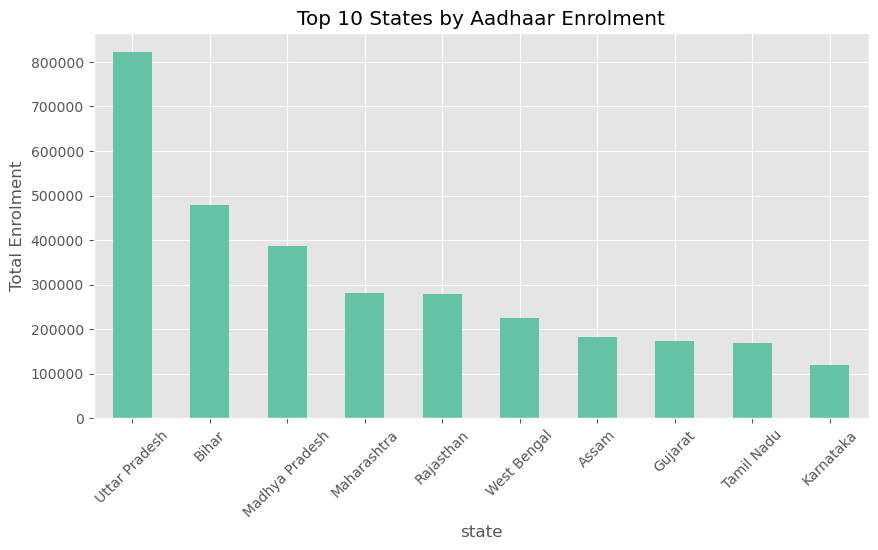

In [114]:
state_enrolment = df.groupby("state")["total_enrolment"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
state_enrolment.head(10).plot(kind="bar")
plt.title("Top 10 States by Aadhaar Enrolment")
plt.ylabel("Total Enrolment")
plt.xticks(rotation=45)
plt.show()


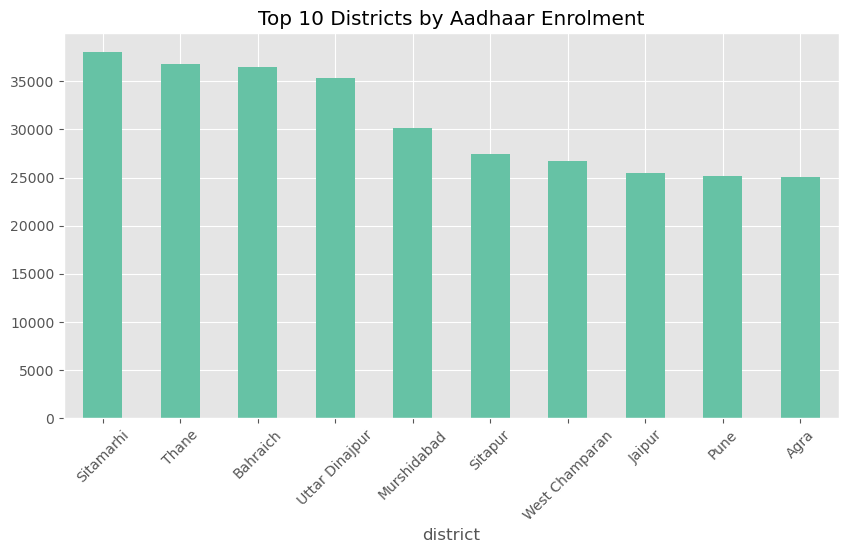

In [115]:
district_enrolment = df.groupby("district")["total_enrolment"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
district_enrolment.head(10).plot(kind="bar")
plt.title("Top 10 Districts by Aadhaar Enrolment")
plt.xticks(rotation=45)
plt.show()


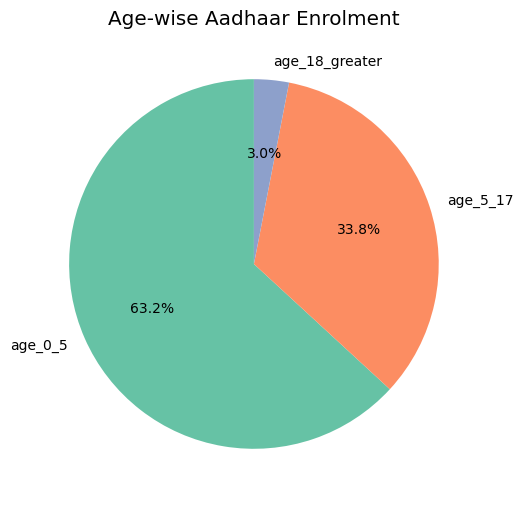

In [116]:
age_data = df[["age_0_5", "age_5_17", "age_18_greater"]].sum()

plt.figure(figsize=(6,6))
age_data.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Age-wise Aadhaar Enrolment")
plt.ylabel("")
plt.show()


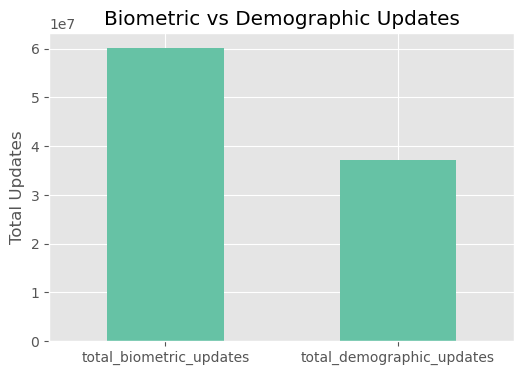

In [117]:
update_data = df[[
    "total_biometric_updates",
    "total_demographic_updates"
]].sum()

update_data.plot(kind="bar", figsize=(6,4))
plt.title("Biometric vs Demographic Updates")
plt.ylabel("Total Updates")
plt.xticks(rotation=0)
plt.show()


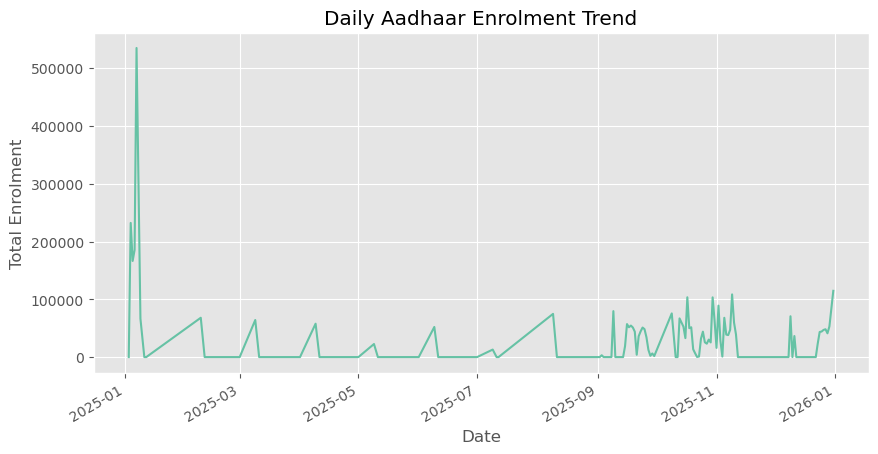

In [118]:
daily_trend = df.groupby("date")["total_enrolment"].sum()

plt.figure(figsize=(10,5))
daily_trend.plot()
plt.title("Daily Aadhaar Enrolment Trend")
plt.xlabel("Date")
plt.ylabel("Total Enrolment")
plt.show()


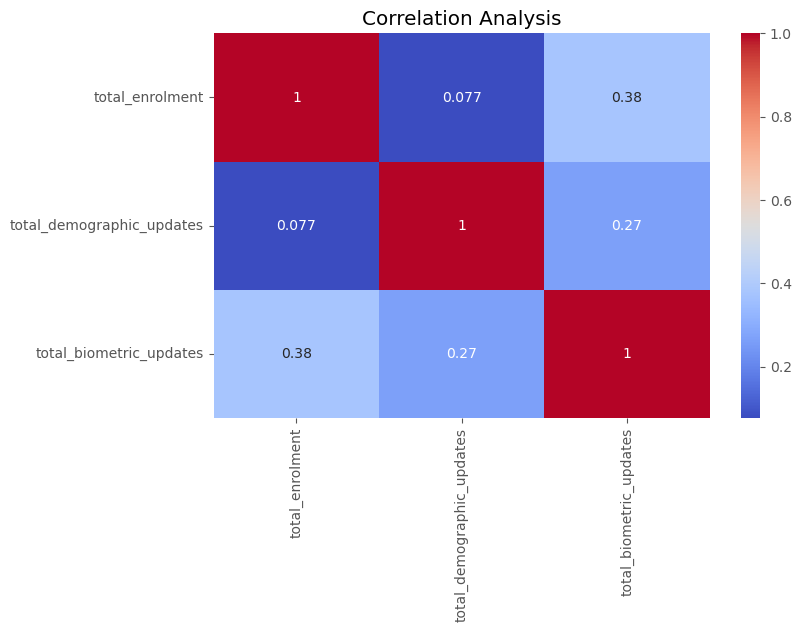

In [119]:
plt.figure(figsize=(8,5))
sns.heatmap(
    df[[
        "total_enrolment",
        "total_demographic_updates",
        "total_biometric_updates"
    ]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Analysis")
plt.show()


In [120]:
age_analysis = df[[
    "age_0_5", "age_5_17", "age_18_greater",
    "demo_age_5_17", "demo_age_17_",
    "bio_age_5_17", "bio_age_17_"
]].sum()

print(age_analysis)


age_0_5            2523356.0
age_5_17           1350641.0
age_18_greater      121747.0
demo_age_5_17      3719719.0
demo_age_17_      33439550.0
bio_age_5_17      29668669.0
bio_age_17_       30508967.0
dtype: float64


In [121]:
state_summary = df.groupby("state")[[
    "total_enrolment",
    "total_demographic_updates",
    "total_biometric_updates"
]].sum()

state_summary.sort_values(
    "total_enrolment",
    ascending=False
).head(10)


,total_enrolment,total_demographic_updates,total_biometric_updates
state,,,
Uttar Pradesh,823260.0,6674455.0,8434576.0
Bihar,479255.0,3890859.0,4650021.0
Madhya Pradesh,386896.0,2524084.0,5501398.0
Maharashtra,282275.0,3793405.0,8226193.0
Rajasthan,278387.0,2427640.0,3692196.0
West Bengal,224130.0,2273822.0,1671310.0
Assam,183258.0,721035.0,863537.0
Gujarat,174346.0,1412844.0,2683515.0
Tamil Nadu,169067.0,1789644.0,4509737.0


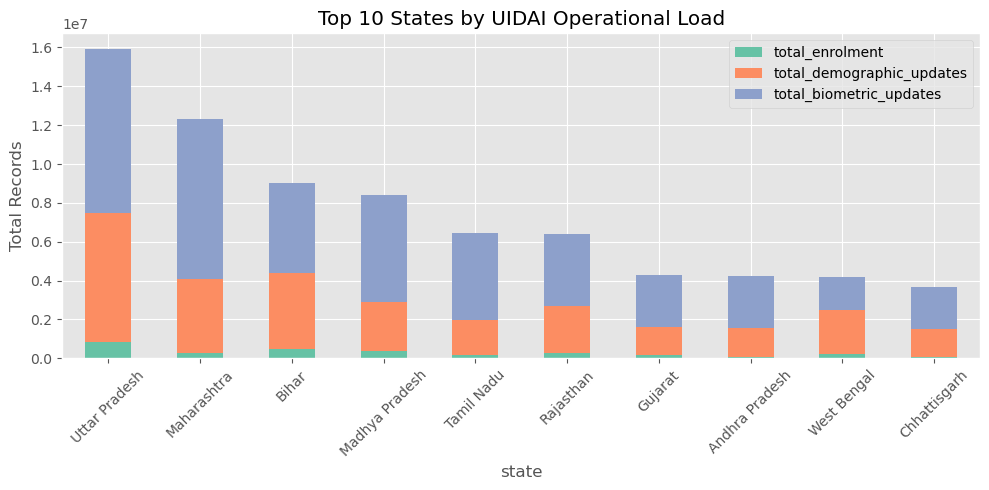

In [122]:
state_sum = df.groupby("state")[[
    "total_enrolment",
    "total_demographic_updates",
    "total_biometric_updates"
]].sum()

top_states = state_sum.sum(axis=1).sort_values(ascending=False).head(10).index
state_sum = state_sum.loc[top_states]

state_sum.plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Top 10 States by UIDAI Operational Load")
plt.ylabel("Total Records")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


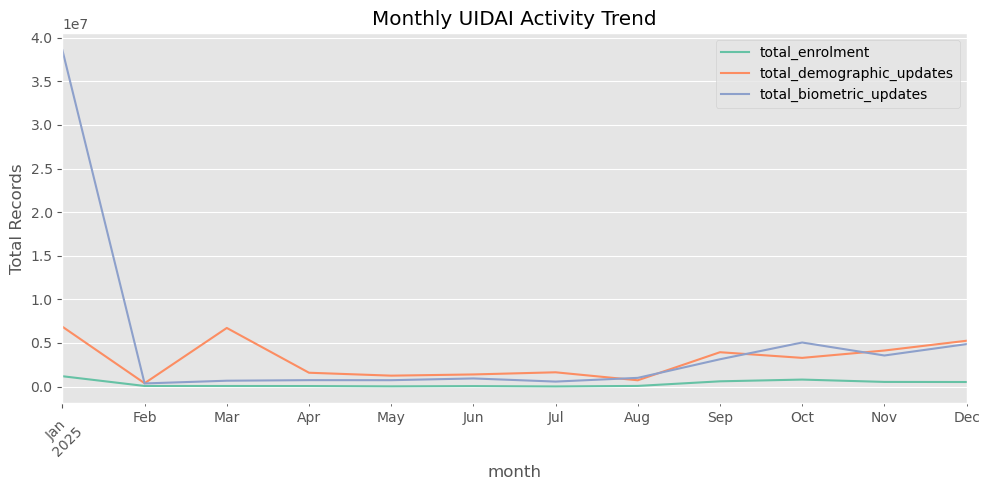

In [123]:
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M")

monthly = df.groupby("month")[[
    "total_enrolment",
    "total_demographic_updates",
    "total_biometric_updates"
]].sum()

monthly.plot(figsize=(10,5))
plt.title("Monthly UIDAI Activity Trend")
plt.ylabel("Total Records")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


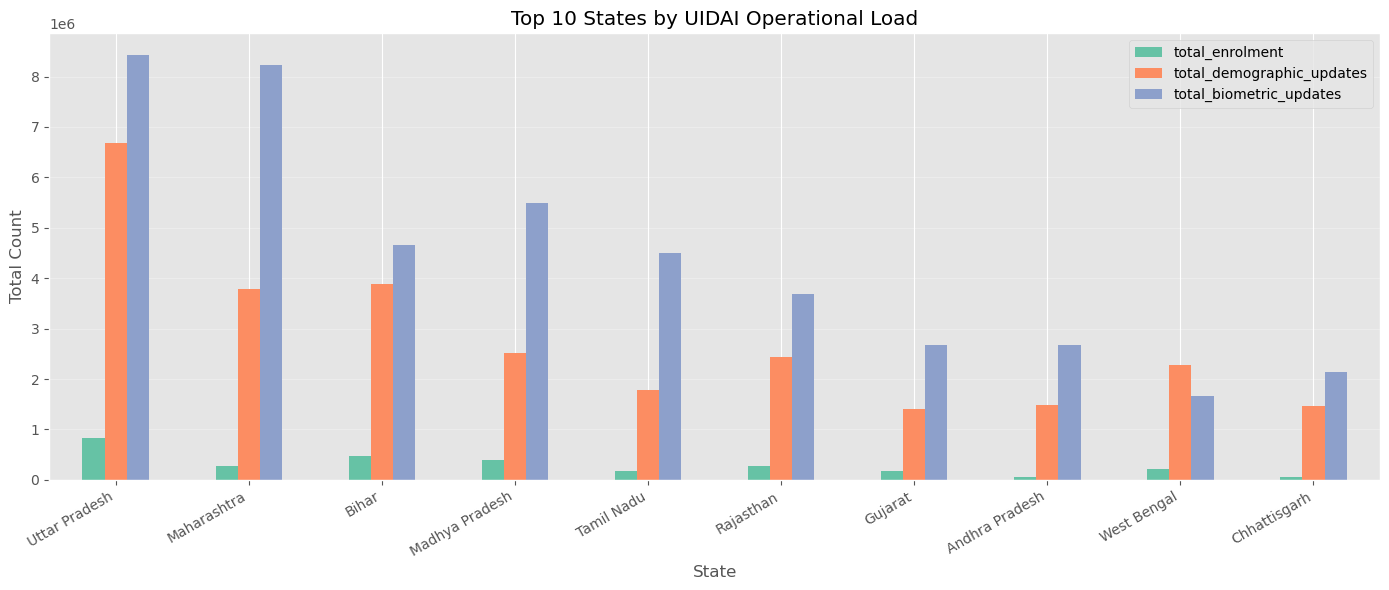

In [124]:
state_load = df.groupby("state")[[
    "total_enrolment",
    "total_demographic_updates",
    "total_biometric_updates"
]].sum()

top_states = state_load.sum(axis=1).sort_values(ascending=False).head(10).index
state_load = state_load.loc[top_states]

state_load.plot(
    kind="bar",
    figsize=(14,6)
)

plt.title("Top 10 States by UIDAI Operational Load")
plt.xlabel("State")
plt.ylabel("Total Count")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


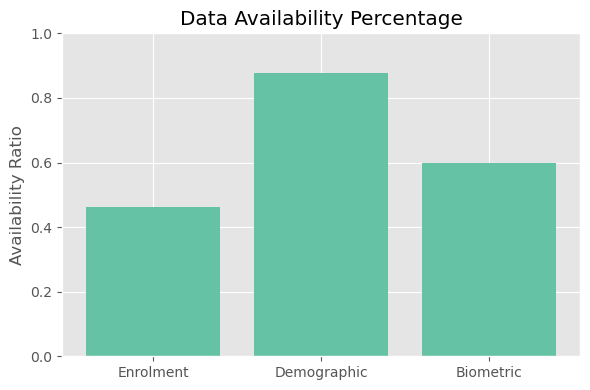

In [125]:
availability = {
    "Enrolment": (df["total_enrolment"] > 0).mean(),
    "Demographic": (df["demo_data_available"] == 1).mean(),
    "Biometric": (df["bio_data_available"] == 1).mean()
}

plt.figure(figsize=(6,4))
plt.bar(availability.keys(), availability.values())
plt.title("Data Availability Percentage")
plt.ylabel("Availability Ratio")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


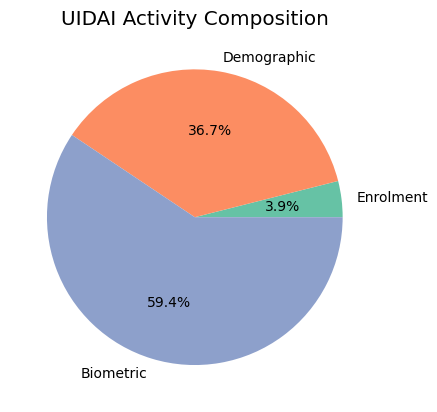

In [126]:
totals = [
    df["total_enrolment"].sum(),
    df["total_demographic_updates"].sum(),
    df["total_biometric_updates"].sum()
]

plt.figure()
plt.pie(totals, labels=["Enrolment", "Demographic", "Biometric"], autopct="%1.1f%%")
plt.title("UIDAI Activity Composition")
plt.show()


In [127]:
states = sorted(df["state"].unique())
districts = sorted(df["district"].unique())

pd.Series(states).to_csv("output/state_list.csv", index=False)
pd.Series(districts).to_csv("output/district_list.csv", index=False)


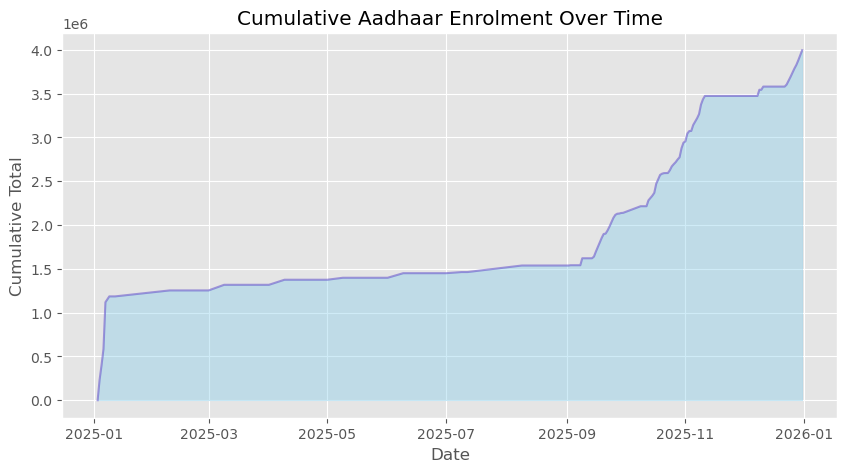

In [128]:
# Cumulative sum over time
daily_trend = df.groupby("date")["total_enrolment"].sum().sort_index()
cumulative_enrolment = daily_trend.cumsum()

plt.figure(figsize=(10, 5))
plt.fill_between(cumulative_enrolment.index, cumulative_enrolment, color="skyblue", alpha=0.4)
plt.plot(cumulative_enrolment.index, cumulative_enrolment, color="Slateblue", alpha=0.6)
plt.title("Cumulative Aadhaar Enrolment Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Total")
plt.show()

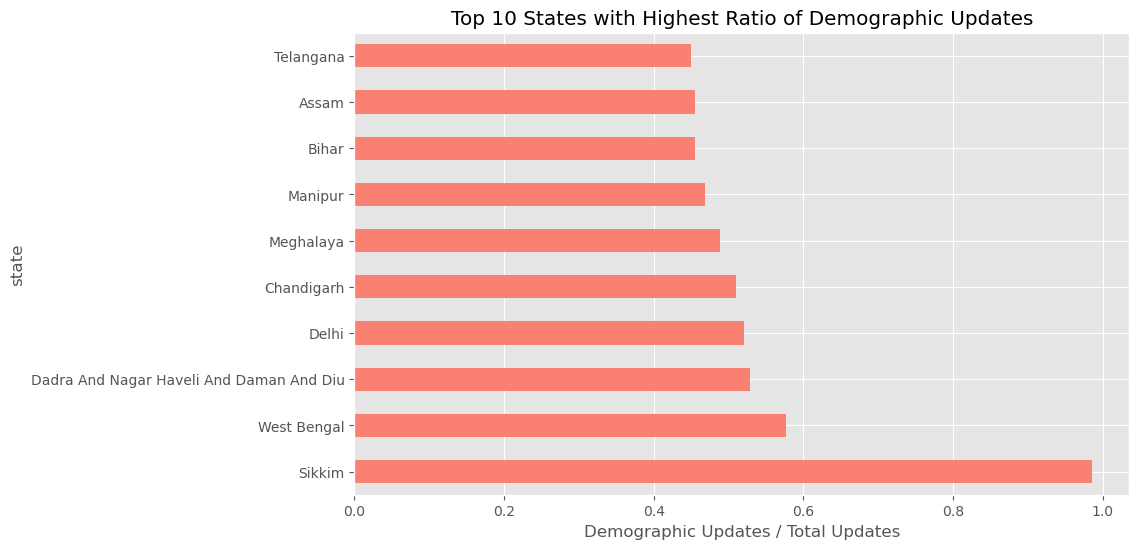

In [129]:
state_ratios = df.groupby("state")[["total_demographic_updates", "total_biometric_updates"]].sum()
state_ratios["demo_ratio"] = state_ratios["total_demographic_updates"] / (state_ratios["total_demographic_updates"] + state_ratios["total_biometric_updates"])

# Plotting top 10 states by highest demographic update ratio
plt.figure(figsize=(10, 6))
state_ratios["demo_ratio"].sort_values(ascending=False).head(10).plot(kind="barh", color="salmon")
plt.title("Top 10 States with Highest Ratio of Demographic Updates")
plt.xlabel("Demographic Updates / Total Updates")
plt.show()

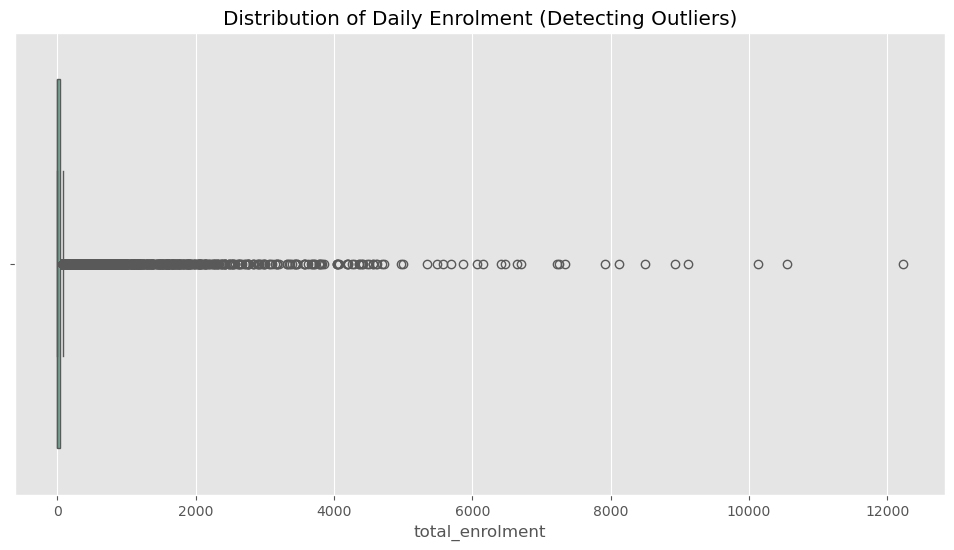

High Activity Hotspots (Top 1%):
          date  state district  total_enrolment
740 2025-01-04  Assam    Baksa           1078.0
744 2025-01-04  Assam   Cachar           1748.0
746 2025-01-04  Assam  Chirang            567.0
747 2025-01-04  Assam  Darrang           1264.0
749 2025-01-04  Assam   Dhubri           1732.0


In [130]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="total_enrolment", y=None)
plt.title("Distribution of Daily Enrolment (Detecting Outliers)")
plt.show()

# Top outliers (districts with exceptionally high activity)
outliers = df[df["total_enrolment"] > df["total_enrolment"].quantile(0.99)]
print("High Activity Hotspots (Top 1%):")
print(outliers[["date", "state", "district", "total_enrolment"]].head())

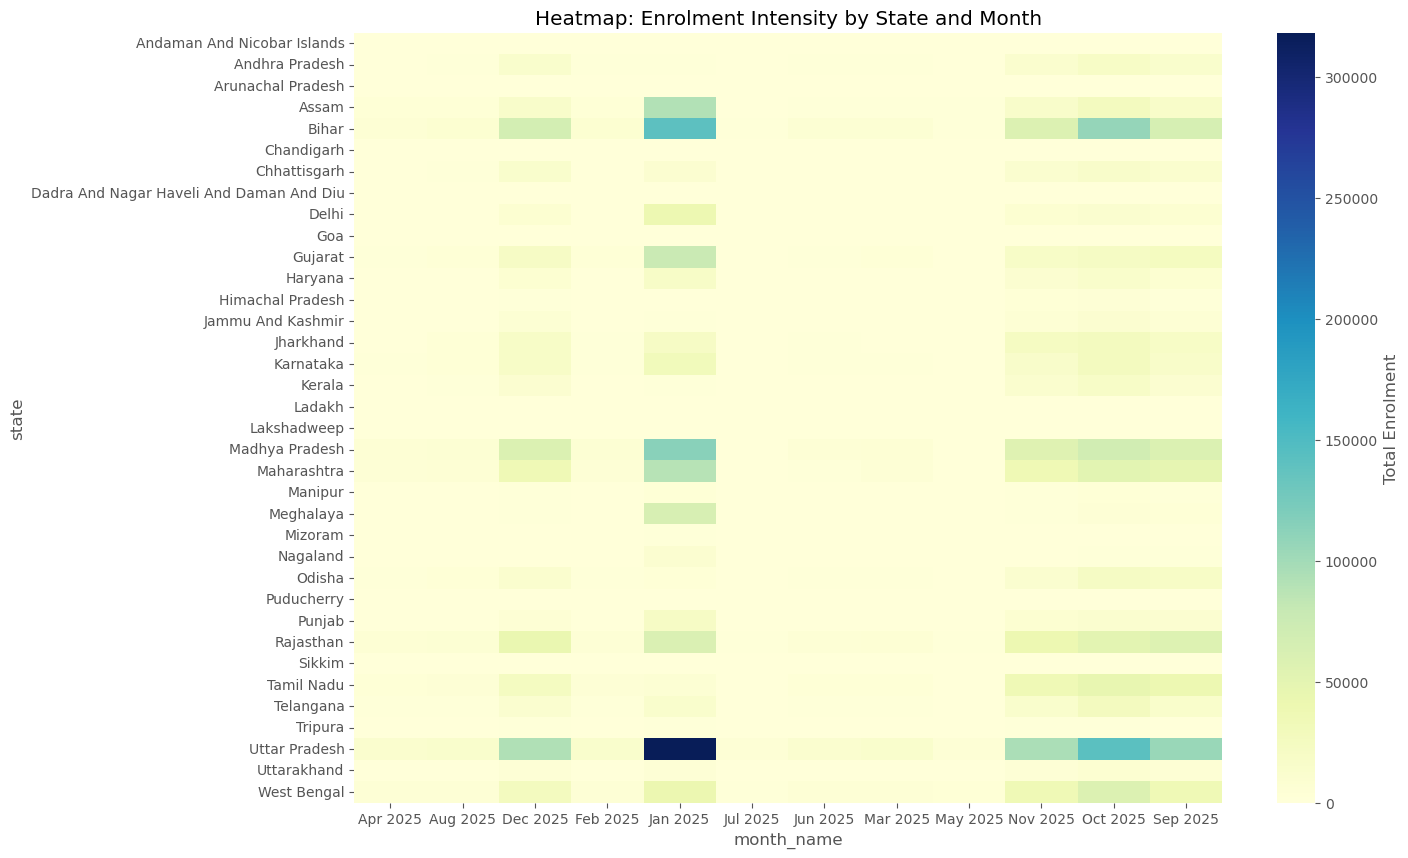

In [131]:
# Pivot data for heatmap
df['month_name'] = df['date'].dt.strftime('%b %Y')
pivot_data = df.groupby(['state', 'month_name'])['total_enrolment'].sum().unstack()

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=False, cbar_kws={'label': 'Total Enrolment'})
plt.title("Heatmap: Enrolment Intensity by State and Month")
plt.show()

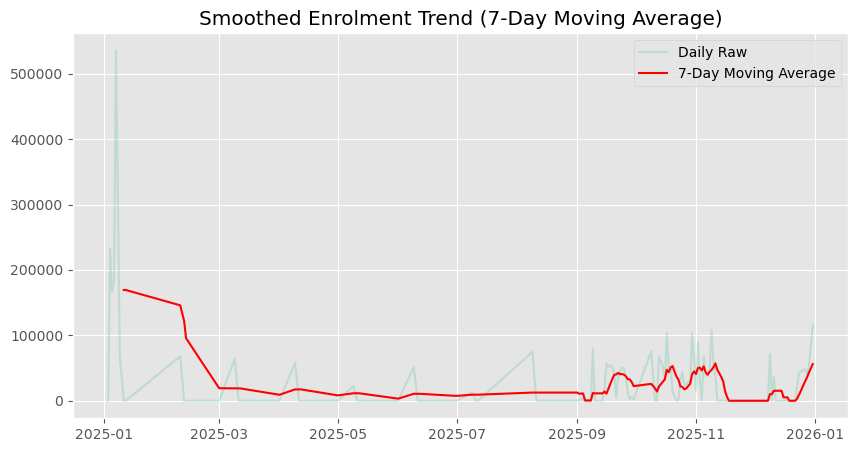

In [132]:
daily_trend_smooth = daily_trend.rolling(window=7).mean()

plt.figure(figsize=(10, 5))
plt.plot(daily_trend.index, daily_trend, alpha=0.3, label="Daily Raw")
plt.plot(daily_trend_smooth.index, daily_trend_smooth, color="red", label="7-Day Moving Average")
plt.title("Smoothed Enrolment Trend (7-Day Moving Average)")
plt.legend()
plt.show()